# 2D Fourier Transform - introduction

<a id='ref'></a>
## References

* Yilmaz, Öz (2001). Seismic Data Analysis: Processing, Inversion, and Interpretation of Seismic Data, 2 ed.: Society of Exploration Geophysicists. ISBN 1-56080-098-4

In [1]:
import numpy as np
from scipy.fft import fft2, ifft2, fftshift, ifftshift, fftfreq
import matplotlib.pyplot as plt
import matplotlib as mpl
import my_functions as mfun

<a id='sec1'></a>
## Fourier transform example

In [2]:
# number of samples
M = 400 # along x
N = 800 # along y

In [3]:
# period (in meters)
Tx = 1
Ty = 1

In [4]:
# sampling interval (is meters)
dx = Tx/M
dy = Ty/N
print(dx)
print(dy)

0.0025
0.00125


In [5]:
# x and y (in meters)
x = np.linspace(0, M*dx, M)
y = np.linspace(0, N*dy, N)
y, x = np.meshgrid(y, x)

In [6]:
x[:5,:5]

array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.00250627, 0.00250627, 0.00250627, 0.00250627, 0.00250627],
       [0.00501253, 0.00501253, 0.00501253, 0.00501253, 0.00501253],
       [0.0075188 , 0.0075188 , 0.0075188 , 0.0075188 , 0.0075188 ],
       [0.01002506, 0.01002506, 0.01002506, 0.01002506, 0.01002506]])

In [7]:
y[:5,:5]

array([[0.        , 0.00125156, 0.00250313, 0.00375469, 0.00500626],
       [0.        , 0.00125156, 0.00250313, 0.00375469, 0.00500626],
       [0.        , 0.00125156, 0.00250313, 0.00375469, 0.00500626],
       [0.        , 0.00125156, 0.00250313, 0.00375469, 0.00500626],
       [0.        , 0.00125156, 0.00250313, 0.00375469, 0.00500626]])

In [8]:
# auxiliary function to create our synthetic signal
def synthetic_signal_2d(A, u, v, x, y):
    assert x.shape == y.shape, 'x and y must have the same shape'
    assert len(A) == len(u) == len(v), 'A, u and v must have the same length'
    signal = np.zeros_like(x)
    for Amn, um, vn in zip(A, u, v):
        # Example with sine
        signal += Amn*np.sin(2*np.pi*(um*x + vn*y))
        # Example with cosine
        #signal += Amn*np.cos(2*np.pi*(um*x + vn*y))
    return signal

In [33]:
# We are gonna to create a signal formed by three components.
# The lists below contain the wavenumbers u and v (in 1/m) and the 
# amplitude A of each component.

# Example of signal depending on y only
#u = [ 0,  0,  0]
#v = [10, 30,  2]

# Example of signal depending on x only
#u = [10, 30,  2]
#v = [ 0,  0,  0]

# Example of signal depending on x and y
u = [10, 30,  2]
v = [10, 30,  2]

A = [10,  5, 15]

In [34]:
# This is our synthetic signal
signal = synthetic_signal_2d(A, u, v, x, y)

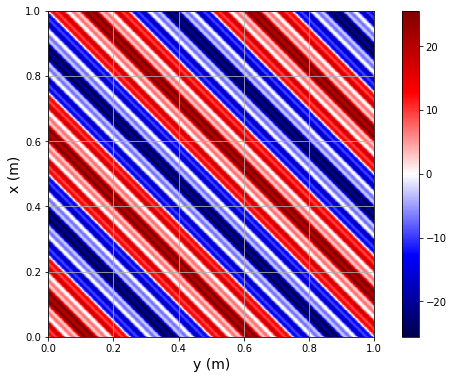

In [35]:
plt.figure(figsize=(10,6))
plt.axis('scaled')
ranges = np.max(np.abs(signal))
plt.pcolormesh(y, x, signal, cmap='seismic', vmin=-ranges, vmax=ranges)
plt.colorbar()
plt.xlabel('y (m)', fontsize=14)
plt.ylabel('x (m)', fontsize=14)
plt.xlim(np.min(y), np.max(y))
plt.ylim(np.min(x), np.max(x))
plt.grid()
plt.show()

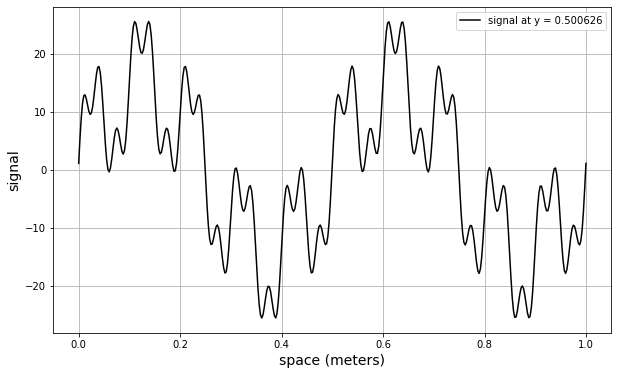

In [36]:
plt.figure(figsize=(10,6))
# Example of signal depending on y only
#plt.plot(y[N//2,:], signal[N//2,:], 'k-', label='signal at x = {:f}'.format(x[y[M//2,N//2]]))
# Example of signal depending on x only
plt.plot(x[:,N//2], signal[:,N//2], 'k-', label='signal at y = {:f}'.format(y[M//2,N//2]))
plt.xlabel('space (meters)', fontsize=14)
plt.ylabel('signal', fontsize=14)
plt.legend(loc='best')
plt.grid()
plt.show()

In [37]:
# Fourier Transform of our signal
FT_signal = fft2(x=signal, norm=None)

In [38]:
# Amplitude spectra of our signal
Amplitude = np.abs(FT_signal)

# For convenience, the amplitude is normalized by its maximum value
Amplitude_max = np.max(Amplitude)

In [39]:
# Frequencies contained in our signal
u_freqs = fftfreq(n=M, d=dx)
v_freqs = fftfreq(n=N, d=dy)

In [40]:
# Minimum and maximum frequency values
print(np.min(u_freqs), np.max(u_freqs))
print(np.min(v_freqs), np.max(v_freqs))

-200.0 199.0
-400.0 399.0


In [41]:
# The maximum absolute frequency is defined by the sampling interval dt 
fnx = 1/(2*dx)
fny = 1/(2*dy)
print(fnx, fny)

200.0 400.0


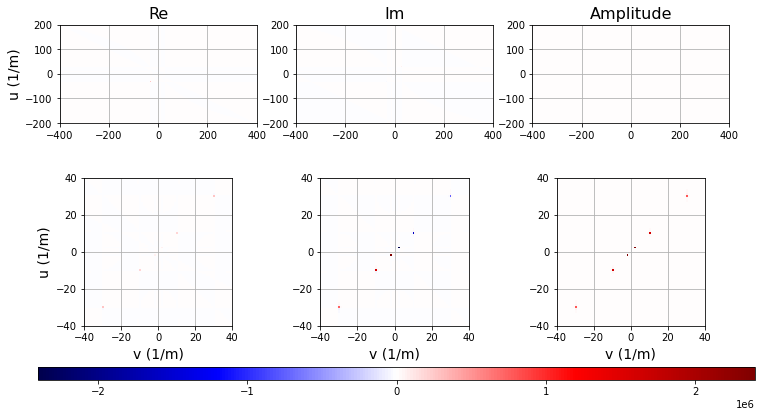

In [42]:
plt.figure(figsize=(12,6))

plt.subplot(2,3,1)
plt.axis('scaled')
plt.title('Re', fontsize=16)
plt.pcolormesh(fftshift(v_freqs), fftshift(u_freqs), fftshift(FT_signal).real, 
               cmap='seismic', vmin = -Amplitude_max, vmax = Amplitude_max)
#plt.colorbar()
#plt.xlabel('v (1/m)', fontsize=14)
plt.ylabel('u (1/m)', fontsize=14)
plt.yticks(ticks=np.arange(-fny, fny+100, 100))
plt.xlim(-fny, fny)
plt.ylim(-fnx, fnx)
plt.grid()

plt.subplot(2,3,2)
plt.axis('scaled')
plt.title('Im', fontsize=16)
plt.pcolormesh(fftshift(v_freqs), fftshift(u_freqs), fftshift(FT_signal).imag, 
               cmap='seismic', vmin = -Amplitude_max, vmax = Amplitude_max)
#plt.xlabel('v (1/m)', fontsize=14)
#plt.ylabel('u (1/m)', fontsize=14)
plt.xlim(-fny, fny)
plt.ylim(-fnx, fnx)
plt.grid()

plt.subplot(2,3,3)
plt.axis('scaled')
plt.title('Amplitude', fontsize=16)
plt.pcolormesh(fftshift(v_freqs), fftshift(u_freqs), fftshift(Amplitude),
               cmap='seismic', vmin = -Amplitude_max, vmax = Amplitude_max)
#plt.colorbar()
#plt.xlabel('v (1/m)', fontsize=14)
#plt.ylabel('u (1/m)', fontsize=14)
plt.xlim(-fny, fny)
plt.ylim(-fnx, fnx)
plt.grid()

plt.subplot(2,3,4)
plt.axis('scaled')
#plt.title('Re', fontsize=16)
plt.pcolormesh(fftshift(v_freqs), fftshift(u_freqs), fftshift(FT_signal).real, 
               cmap='seismic', vmin = -Amplitude_max, vmax = Amplitude_max)
#plt.colorbar()
plt.xlabel('v (1/m)', fontsize=14)
plt.ylabel('u (1/m)', fontsize=14)
plt.xlim(-0.1*fny, 0.1*fny)
plt.ylim(-0.2*fnx, 0.2*fnx)
plt.grid()

plt.subplot(2,3,5)
plt.axis('scaled')
#plt.title('Im', fontsize=16)
plt.pcolormesh(fftshift(v_freqs), fftshift(u_freqs), fftshift(FT_signal).imag,
               cmap='seismic', vmin = -Amplitude_max, vmax = Amplitude_max)
#plt.colorbar()
plt.xlabel('v (1/m)', fontsize=14)
#plt.ylabel('u (1/m)', fontsize=14)
plt.xlim(-0.1*fny, 0.1*fny)
plt.ylim(-0.2*fnx, 0.2*fnx)
plt.grid()

plt.subplot(2,3,6)
plt.axis('scaled')
#plt.title('Amplitude', fontsize=16)
plt.pcolormesh(fftshift(v_freqs), fftshift(u_freqs), fftshift(Amplitude),
               cmap='seismic', vmin = -Amplitude_max, vmax = Amplitude_max)
#plt.colorbar()
plt.xlabel('v (1/m)', fontsize=14)
#plt.ylabel('u (1/m)', fontsize=14)
plt.xlim(-0.1*fny, 0.1*fny)
plt.ylim(-0.2*fnx, 0.2*fnx)
plt.grid()

#cax = plt.axes([0.93, 0.15, 0.030, 0.85])
cax = plt.axes([0.1, 0.0, 0.83, 0.03])
plt.colorbar(cax=cax, orientation='horizontal')

plt.show()